In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import spectres
from astropy import constants as cst, units as u

In [2]:
# initialize species
# this notebook will work, even if you have a clean installation of the package
# see https://species.readthedocs.io/ for more
import species

species.SpeciesInit()
database = species.Database()

species v0.6.0
Working folder: /Users/bluez3303/Documents/GitHub/hip65426
Configuration settings:
   - Database: /Users/bluez3303/Documents/GitHub/hip65426/species_database.hdf5
   - Data folder: /Users/bluez3303/Documents/GitHub/hip65426/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03


In [3]:
include_gravity = True
include_sinfoni = True
include_jwst = True
include_newnaco = True
include_sphere = True
include_naco = True
sphere_gp = True
teff_lowprior = False
teff_hiprior = False
model_choice = "exo-rem"
make_sphere_gp_plot = False
make_sinfoni_plot = False

filepref = "results/"
if include_gravity:
    filepref += "gravity_"
if include_sinfoni:
    filepref += "sinfoni_"
if include_jwst:
    filepref += "jwst_"
if not sphere_gp:
    filepref += "nosphereGP_"
if teff_lowprior:
    filepref += "tefflo_"
if teff_hiprior:
    filepref += "teffhi_"
if not include_newnaco:
    filepref += "nonewNACO_"
if not include_naco:
    filepref += "noNACO_"
if not include_sphere:
    filepref += "noSPHERE_"

filepref += "{}/".format(model_choice)
if not os.path.isdir(filepref):
    os.mkdir(filepref)
if not os.path.isdir("{}multinest/".format(filepref)):
    os.mkdir("{}multinest/".format(filepref))

In [4]:
# download and shape up the HIP 65426 b SPHERE spectrum
import urllib.request

urllib.request.urlretrieve(
    "https://home.strw.leidenuniv.nl/~stolker/species/spectra/hip65426_sphere_yjh.dat",
    "data/hip65426_sphere_yjh.dat",
)

sphere_yjh = pd.read_csv(
    "data/hip65426_sphere_yjh.dat",
    delim_whitespace=True,
    comment="#",
    names=["l", "f", "fe"],
)
sphere_yjh = sphere_yjh[2:]
sphere_yjh.to_csv("data/hip65426_sphere_yjh.dat", sep=" ", header=False, index=False)

# shape up the SINFONI spectrum
sinfoni = pd.read_csv(
    "data/HIP_65426_B_final_noLSS_spec.txt",
    comment="#",
    delim_whitespace=True,
    usecols=[0, 1, 2, 6],
    names=["l", "f", "fe", "inst"],
)
sinfoni = sinfoni[sinfoni.inst == "SINFONI-K"]
sinfoni[["l", "f", "fe"]].to_csv("data/sinfoni.dat", sep=" ", header=False, index=False)

In [5]:
plx = (9.3031, 0.0346)  # Gaia DR3

In [6]:
spectrum = {}

if include_sphere:
    spectrum["SPHERE_IFS"] = ("data/hip65426_sphere_yjh.dat", None, 40.0)

if include_sinfoni:
    spectrum["SINFONI-K"] = ("data/sinfoni.dat", None, 5577.0)

if include_gravity:
    spectrum["GRAVITY"] = (
        "data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits",
        "data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits",
        500.0,
    )

database.add_object(
    "HIP 65426 b",
    parallax=None,
    app_mag=None,
    flux_density=None,
    spectrum=spectrum,
    deredden=None,
)

Adding object: HIP 65426 b
   - Spectrum:
      - Database tag: SPHERE_IFS
      - Filename: data/hip65426_sphere_yjh.dat
      - Data shape: (37, 3)
      - Wavelength range (um): 0.99 - 1.64
      - Mean flux (W m-2 um-1): 5.54e-17
      - Mean error (W m-2 um-1): 5.45e-18
   - Spectrum:
      - Database tag: SINFONI-K
      - Filename: data/sinfoni.dat
      - Data shape: (1979, 3)
      - Wavelength range (um): 1.97 - 2.45
      - Mean flux (W m-2 um-1): 6.26e-17
      - Mean error (W m-2 um-1): 2.97e-17
   - GRAVITY spectrum:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits
      - Data shape: (192, 3)
      - Wavelength range (um): 2.05 - 2.48
      - Mean flux (W m-2 um-1): 6.48e-17
      - Mean error (W m-2 um-1): 1.60e-17
   - GRAVITY covariance matrix:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits
      - Data shape

In [7]:
# add archival companion photometry
database.add_companion(name="HIP 65426 b")
objectbox = database.get_object(object_name="HIP 65426 b")

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude = 17.94 +/- 0.05
      - Flux (W m-2 um-1) = 8.73e-17 +/- 4.02e-18
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude = 17.58 +/- 0.06
      - Flux (W m-2 um-1) = 1.03e-16 +/- 5.70e-18
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude = 17.01 +/- 0.09
      - Flux (W m-2 um-1) = 7.63e-17 +/- 6.33e-18
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude = 16.79 +/- 0.09
      - Flux (W m-2 um-1) = 7.21e-17 +/- 5.98e-18
   - Paranal/NACO.Lp:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude = 15.33 +/- 0.12
      - Flux (W m-2 um-1) = 3.88e-17 +/- 4.30e-18
   - Paranal/NACO.NB405:
      - Mean wavelength (um) = 4.7810e+00
      - Apparent magnitude =


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



<>:47: DeprecationWarning: invalid escape sequence '\l'
<>:48: DeprecationWarning: invalid escape sequence '\m'
<>:49: DeprecationWarning: invalid escape sequence '\m'
<>:47: DeprecationWarning: invalid escape sequence '\l'
<>:48: DeprecationWarning: invalid escape sequence '\m'
<>:49: DeprecationWarning: invalid escape sequence '\m'
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/4260181124.py:47: DeprecationWarning: invalid escape sequence '\l'
  ax[1].set_xlabel("$\lambda$ [$\mu$m]")
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/4260181124.py:48: DeprecationWarning: invalid escape sequence '\m'
  ax[0].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/4260181124.py:49: DeprecationWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")


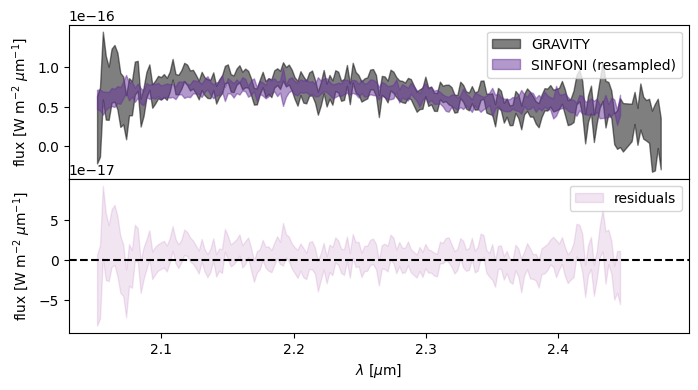

In [8]:
if include_gravity and include_sinfoni:
    # make a plot comparing the SINFONI and GRAVITY spectra
    gravity_spectrum = objectbox.spectrum["GRAVITY"][0]
    sinfoni_spectrum = objectbox.spectrum["SINFONI-K"][0]

    fig, ax = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    plt.subplots_adjust(hspace=0)
    offset = 0

    ax[0].fill_between(
        gravity_spectrum[:, 0],
        offset + gravity_spectrum[:, 1] + gravity_spectrum[:, 2],
        offset + gravity_spectrum[:, 1] - gravity_spectrum[:, 2],
        color="k",
        alpha=0.5,
        label="GRAVITY",
    )

    # downsample the SINFONI data to directly compare with GRAVITY
    sinfoni_equivalent_flux = np.zeros(len(gravity_spectrum))

    gravity_wavelength = gravity_spectrum[:, 0]
    gravity_dlambda = gravity_wavelength[1] - gravity_wavelength[0]
    sinfoni_dlambda = sinfoni_spectrum[1, 0] - sinfoni_spectrum[0, 0]

    sinfoni_equivalent_flux, sinfoni_equivalent_flux_errs = spectres.spectres(
        gravity_wavelength,
        sinfoni_spectrum[:, 0],
        sinfoni_spectrum[:, 1],
        sinfoni_spectrum[:, 2],
        fill=0,
    )

    ax[0].fill_between(
        gravity_wavelength[sinfoni_equivalent_flux > 0],
        offset
        + sinfoni_equivalent_flux[sinfoni_equivalent_flux > 0]
        + sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux > 0],
        offset
        + sinfoni_equivalent_flux[sinfoni_equivalent_flux > 0]
        - sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux > 0],
        color="rebeccapurple",
        alpha=0.5,
        label="SINFONI (resampled)",
    )

    ax[1].set_xlabel("$\lambda$ [$\mu$m]")
    ax[0].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
    ax[1].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")

    ax[0].set_yticks([0, 5e-17, 10e-17])

    ax[1].set_yticks([-5e-17, 0, 5e-17])
    ax[0].legend()

    residuals = (
        gravity_spectrum[:, 1][sinfoni_equivalent_flux > 0]
        - sinfoni_equivalent_flux[sinfoni_equivalent_flux > 0]
    )
    residual_errors = np.sqrt(
        gravity_spectrum[:, 2][sinfoni_equivalent_flux > 0] ** 2
        + sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux > 0] ** 2
    )

    ax[1].axhline(0, color="k", ls="--")
    ax[1].fill_between(
        gravity_wavelength[sinfoni_equivalent_flux > 0],
        residuals + residual_errors,
        residuals - residual_errors,
        color="purple",
        alpha=0.1,
        label="residuals",
    )
    ax[1].legend()
    plt.savefig("results/plots/gravity_vs_sinfoni.png", dpi=250)

In [9]:
database.add_object(
    "HIP 65426 b",
    parallax=plx,
    app_mag={  # Carter et al. ERS vegamag (using May 3 arxiv version)
        "JWST/NIRCAM.F250M": (16.915, 0.083),  # (17.163, 0.140),
        "JWST/NIRCAM.F300M": (16.595, 0.076),  # (16.827, 0.117),
        "JWST/NIRCAM.F356W": (15.747, 0.074),  # (16.067, 0.115),
        "JWST/NIRCAM.F410M": (15.499, 0.077),  # (15.781, 0.120),
        "JWST/NIRCAM.F444W": (15.467, 0.078),  # (15.701, 0.126),
        "JWST/MIRI.F1140C": (14.986, 0.169),  # (15.357, 0.093),
        "JWST/MIRI.F1550C": (14.705, 0.182),  # (15.197, 0.177)
    },
    spectrum=None,
    deredden=None,
)

if (
    not include_jwst or model_choice == "exo-rem"
):  # don't use MIRI points for exo-rem because the model doesn't go out far enough
    database.delete_data("objects/HIP 65426 b/JWST/MIRI.F1550C")
    database.delete_data("objects/HIP 65426 b/JWST/MIRI.F1140C")
if not include_jwst:
    database.delete_data("objects/HIP 65426 b/JWST/NIRCAM.F444W")
    database.delete_data("objects/HIP 65426 b/JWST/NIRCAM.F410M")
    database.delete_data("objects/HIP 65426 b/JWST/NIRCAM.F356W")
    database.delete_data("objects/HIP 65426 b/JWST/NIRCAM.F300M")
    database.delete_data("objects/HIP 65426 b/JWST/NIRCAM.F250M")
if not include_newnaco:
    database.delete_data("objects/HIP 65426 b/Paranal/NACO.NB405")
if not include_naco:
    database.delete_data("objects/HIP 65426 b/Paranal/NACO.Lp")
    database.delete_data("objects/HIP 65426 b/Paranal/NACO.Mp")
if not include_sphere:
    database.delete_data("objects/HIP 65426 b/Paranal/SPHERE.IRDIS_D_K12_2")
    database.delete_data("objects/HIP 65426 b/Paranal/SPHERE.IRDIS_D_K12_1")
    database.delete_data("objects/HIP 65426 b/Paranal/SPHERE.IRDIS_D_H23_3")
    database.delete_data("objects/HIP 65426 b/Paranal/SPHERE.IRDIS_D_H23_2")
    database.delete_data("objects/HIP 65426 b/Paranal/SPHERE.IRDIS_D_H23_2")
    database.delete_data("objects/HIP 65426 b/SPHERE_IFS")

objectbox = database.get_object(object_name="HIP 65426 b")
objectbox.open_box()

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - JWST/NIRCAM.F250M:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 16.91 +/- 0.08
      - Flux (W m-2 um-1) = 4.33e-17 +/- 3.32e-18
   - JWST/NIRCAM.F300M:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 16.59 +/- 0.08
      - Flux (W m-2 um-1) = 2.99e-17 +/- 2.10e-18
   - JWST/NIRCAM.F356W:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 15.75 +/- 0.07
      - Flux (W m-2 um-1) = 3.37e-17 +/- 2.30e-18
   - JWST/NIRCAM.F410M:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 15.50 +/- 0.08
      - Flux (W m-2 um-1) = 2.49e-17 +/- 1.77e-18
   - JWST/NIRCAM.F444W:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 15.47 +/- 0.08
      - Flux (W m-2 um-1) = 1.94e-17 +/- 1.40e-18
   - JWST/MIRI.F1140C:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 14.99 +/- 0.17
      - Flux (W m-2 um-1) = 

In [10]:
database.add_model(model=model_choice, teff_range=(1200.0, 2000.0))

Unpacking Exo-REM model spectra (530 MB)...

/Users/bluez3303/Documents/GitHub/species/species/data/model_spectra.py:95: UserWarning: The Exo-Rem grid has been updated to the latest version from https://lesia.obspm.fr/exorem/YGP_grids/. Please consider removing the grid from the 'data_folder' if needed such that the latest version of the grid will be downloaded and added to the HDF5 database.
  warnings.warn(


 [DONE]
Please cite Charney et al. (2018) when using Exo-REM in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2018ApJ...854..172C/abstract
Wavelength range (um) = 0.35 - 250.0
Spectral resolution = 500
Teff range (K) = 1200.0 - 2000.0
Adding Exo-REM model spectra... [DONE]                                              
Grid points stored in the database:
   - Teff = [1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000.]
   - log(g) = [3.5 4.  4.5 5. ]
   - [Fe/H] = [-0.5  0.   0.5]
   - C/O = [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]
Number of grid points per parameter:
   - teff: 17
   - logg: 4
   - feh: 3
   - c_o_ratio: 12


/Users/bluez3303/Documents/GitHub/species/species/util/data_util.py:379: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Fix missing grid points with a linear interpolation:
   - teff = 1200.0, logg = 3.5, feh = -0.5, c_o_ratio = 0.8
   - teff = 1200.0, logg = 3.5, feh = -0.5, c_o_ratio = 0.85
   - teff = 1200.0, logg = 3.5, feh = 0.0, c_o_ratio = 0.8
   - teff = 1200.0, logg = 3.5, feh = 0.0, c_o_ratio = 0.85
   - teff = 1200.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.7
   - teff = 1200.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.75
   - teff = 1200.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.8
   - teff = 1200.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.85
   - teff = 1200.0, logg = 4.0, feh = -0.5, c_o_ratio = 0.8
   - teff = 1200.0, logg = 4.0, feh = -0.5, c_o_ratio = 0.85
   - teff = 1200.0, logg = 4.0, feh = 0.0, c_o_ratio = 0.8
   - teff = 1200.0, logg = 4.0, feh = 0.0, c_o_ratio = 0.85
   - teff = 1200.0, logg = 4.0, feh = 0.5, c_o_ratio = 0.8
   - teff = 1200.0, logg = 4.0, feh = 0.5, c_o_ratio = 0.85
   - teff = 1200.0, logg = 4.5, feh = -0.5, c_o_ratio = 0.3
   - teff = 1200.0, logg = 4.5, feh = 0.0, c_o_rat

In [11]:
if make_sphere_gp_plot:
    # <3 tinygp <3 I stan
    import tinygp
    import jax.numpy as jnp
    import jax

    jax.config.update("jax_enable_x64", True)

    class JasonWangKernel(tinygp.kernels.Kernel):
        def __init__(self, length_scale, f_amp):
            self.length_scale = length_scale
            self.f_amp = f_amp

        def evaluate(self, X1, X2):
            tau = jnp.abs(X1[1] - X2[1])
            exp_sq = (
                self.f_amp**2
                * X1[0]
                * X2[0]
                * jnp.exp(-0.5 * (tau / self.length_scale) ** 2)
            )

            return exp_sq

    def gp_predict(wavelen, flux_resid, flux_err, f_amp, length_scale):
        kernel = JasonWangKernel(length_scale, f_amp)

        X = (jnp.array(flux_err), jnp.array(wavelen))
        gp = tinygp.GaussianProcess(kernel, X, diag=(1 - f_amp**2) * flux_err**2)
        gp_cond = gp.condition(flux_resid, X, diag=(1 - f_amp**2) * flux_err**2).gp
        mu, stddev = gp_cond.loc, np.sqrt(gp_cond.variance)
        return mu, stddev

In [12]:
if make_sphere_gp_plot:
    # plot the two modes of the BT-SETTL CIFIST spectrum over the SPHERE data
    teff1, teff2 = 1400, 1700
    logg1, logg2 = 4.0, 4.5

    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 9))
    plt.subplots_adjust(hspace=0)
    plt.xlim(0.9, 1.8)

    sphere_spectrum = objectbox.spectrum["SPHERE_IFS"][0]
    ax[0].errorbar(
        sphere_spectrum[:, 0],
        sphere_spectrum[:, 1],
        sphere_spectrum[:, 2],
        ls="",
        fmt="o",
        color="skyblue",
    )

    fmts = [{"color": "purple", "ls": "--"}, {"color": "hotpink", "ls": "-"}]

    for i, teff, logg in zip((0, 1), (teff1, teff2), (logg1, logg2)):
        model = pd.read_csv(
            "data/bt-settl-cifist/bt-settl-cifist_teff_{}_logg_{}_spec.dat".format(
                teff, logg
            ),
            names=["wl", "flux"],
            comment="#",
            delim_whitespace=True,
        )

        m1_flux = spectres.spectres(
            sphere_spectrum[:, 0], model.wl.values, model.flux.values
        )
        best_m, _, _, _ = np.linalg.lstsq(
            m1_flux.reshape(
                len(
                    m1_flux,
                ),
                1,
            ),
            sphere_spectrum[:, 1].reshape(
                len(
                    m1_flux,
                ),
                1,
            ),
        )
        for a in [ax[0], ax[i + 1]]:
            a.plot(
                sphere_spectrum[:, 0],
                m1_flux * best_m[0, 0],
                color=fmts[i]["color"],
                ls=fmts[i]["ls"],
                label="T$_{{\\mathrm{{eff}}}}$={}, $\\log{{g}}$={}".format(teff, logg),
            )

        m1_resids = sphere_spectrum[:, 1] - (m1_flux * best_m[0, 0])
        f_amp, length_scale = 0.5, np.exp(-1.2)

        mu, stddev = gp_predict(
            sphere_spectrum[:, 0], m1_resids, sphere_spectrum[:, 2], f_amp, length_scale
        )
        ax[i + 1].errorbar(
            sphere_spectrum[:, 0],
            sphere_spectrum[:, 1],
            sphere_spectrum[:, 2],
            ls="",
            fmt="o",
            color="skyblue",
        )
        ax[i + 1].fill_between(
            sphere_spectrum[:, 0],
            m1_flux * best_m[0, 0] + mu + stddev,
            m1_flux * best_m[0, 0] + mu - stddev,
            color=fmts[i]["color"],
            alpha=0.2,
        )

    ax[0].legend()
    plt.xlabel("$\\mu$m")
    ax[0].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
    ax[1].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
    ax[2].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
    plt.savefig("results/plots/sphere_bt_settl.png", dpi=250)

<>:82: DeprecationWarning: invalid escape sequence '\m'
<>:83: DeprecationWarning: invalid escape sequence '\m'
<>:84: DeprecationWarning: invalid escape sequence '\m'
<>:82: DeprecationWarning: invalid escape sequence '\m'
<>:83: DeprecationWarning: invalid escape sequence '\m'
<>:84: DeprecationWarning: invalid escape sequence '\m'
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/1001194883.py:82: DeprecationWarning: invalid escape sequence '\m'
  ax[0].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/1001194883.py:83: DeprecationWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/1001194883.py:84: DeprecationWarning: invalid escape sequence '\m'
  ax[2].set_ylabel("flux [W m$^{-2}$ $\mu$m$^{-1}$]")


In [13]:
if make_sinfoni_plot:
    fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
    plt.subplots_adjust(hspace=0)
    sinfoni_spectrum = objectbox.spectrum["SINFONI-K"][0]

    # positive RV = planet spectrum shifted to longer wls = model should be shifted to longer wls

    rv = 50  # [km/s]
    delta_lambda = sinfoni_spectrum[:, 0] * rv / cst.c.to(u.km / u.s).value
    ax[0].plot(
        sinfoni_spectrum[:, 0],
        sinfoni_spectrum[:, 1],
        color="hotpink",
        label="SINFONI data",
        lw=1,
    )
    # ax.errorbar(sinfoni_spectrum[:,0], sinfoni_spectrum[:,1], sinfoni_spectrum[:,2], ls='', markersize=1, fmt='o', color='skyblue', alpha=0.02)
    model = pd.read_csv(
        "data/bt-settl-cifist/bt-settl-cifist_teff_{}_logg_{}_spec.dat".format(
            1600, 4.0
        ),
        # 'data/exo-rem/exo-rem_teff_{}_logg_{}_feh_{}_co_{:.2f}_spec.dat'.format(1600, 4.0, 0.0, 0.60),
        names=["wl", "flux"],
        comment="#",
        delim_whitespace=True,
    )
    model_flux = spectres.spectres(
        sinfoni_spectrum[:, 0]
        - delta_lambda,  # interpolate to the "true" wavelengths, corrected for RV
        model.wl.values,
        model.flux.values,
    )
    model_flux_weighted = (
        model_flux * np.median(sinfoni_spectrum[:, 1]) / np.median(model_flux)
    )
    ax[0].plot(
        sinfoni_spectrum[:, 0] + delta_lambda,
        model_flux_weighted,
        color="k",
        label="model",
        lw=1,
    )
    ax[0].set_ylim(0, 12e-17)
    ax[0].set_xlim(np.min(sinfoni_spectrum[:, 0]), np.max(sinfoni_spectrum[:, 0]))
    ax[0].legend()
    resids = sinfoni_spectrum[:, 1] - model_flux_weighted
    ax[1].scatter(sinfoni_spectrum[:, 0], resids, s=1, color="k")
    ax[1].fill_between(
        sinfoni_spectrum[:, 0],
        resids + sinfoni_spectrum[:, 2],
        resids - sinfoni_spectrum[:, 2],
        color="grey",
        alpha=0.1,
    )
    ax[1].set_ylim(-1e-16, 1e-16)
    ax[1].set_xlabel("wavelength [$\mu$m]")
    plt.savefig("results/plots/sinfoni_kband.png", dpi=250)

<>:56: DeprecationWarning: invalid escape sequence '\m'
<>:56: DeprecationWarning: invalid escape sequence '\m'
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_32468/916299941.py:56: DeprecationWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("wavelength [$\mu$m]")


In [14]:
inc_phot = []

if include_naco:
    inc_phot += ["Paranal/NACO.Lp", "Paranal/NACO.Mp"]

if include_sphere:
    inc_phot += [
        "Paranal/SPHERE.IRDIS_D_H23_2",
        "Paranal/SPHERE.IRDIS_D_H23_3",
        "Paranal/SPHERE.IRDIS_D_K12_1",
        "Paranal/SPHERE.IRDIS_D_K12_2",
    ]

if include_newnaco:
    inc_phot += ["Paranal/NACO.NB405"]
if include_jwst:
    inc_phot += [
        "JWST/NIRCAM.F250M",
        "JWST/NIRCAM.F300M",
        "JWST/NIRCAM.F356W",
        "JWST/NIRCAM.F410M",
        "JWST/NIRCAM.F444W",
    ]
if include_jwst and model_choice == "bt-settl-cifist":
    inc_phot += ["JWST/MIRI.F1140C", "JWST/MIRI.F1550C"]

if sphere_gp:
    fit_corr = ["SPHERE_IFS"]
else:
    fit_corr = []
if teff_lowprior:
    teff_bounds = (1200.0, 1500.0)
elif teff_hiprior:
    teff_bounds = (1500.0, 2000.0)
else:
    teff_bounds = (1200.0, 2000.0)


bounds = {
    "teff": teff_bounds,
    # "vsini": (0, 100)
    # 'SPHERE_IFS':(None, None, (0, 50))
}

if (
    include_sinfoni and model_choice == "exo-rem"
):  # only include an RV fit parameter if fitting exo-rem models because the RV goes up to edge of grid for bt-settl
    bounds["SINFONI-K"] = (None, None, (0, 50))
fit = species.FitModel(
    object_name="HIP 65426 b",
    model=model_choice,
    bounds=bounds,
    inc_phot=inc_phot,
    inc_spec=True,
    fit_corr=fit_corr,
)

Getting object: HIP 65426 b... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/NACO.Mp... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Interpolating Paranal/NACO.NB405... [DONE]
Interpolating JWST/NIRCAM.F250M... [DONE]
Interpolating JWST/NIRCAM.F300M... [DONE]
Interpolating JWST/NIRCAM.F356W... [DONE]
Interpolating JWST/NIRCAM.F410M... [DONE]
Interpolating JWST/NIRCAM.F444W... [DONE]
Interpolating GRAVITY... [DONE]
Interpolating SINFONI-K... [DONE]
Interpolating SPHERE_IFS... [DONE]
Fitting 9 parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - radius
   - parallax
   - corr_len_SPHERE_IFS
   - corr_amp_SPHERE_IFS
   - radvel_SINFONI-K
Prior boundaries:
   - teff = (1200.0, 2000.0)
   - logg = (3.5, 5.0)
   - feh = (-0.5, 0.5)
   - c_o_ratio = (0.3, 0.85)
   - radius = (0.5, 5.0)
   - 

In [15]:
tag = "hip65426_{}".format(filepref.split("/")[1])

In [16]:
fit.run_multinest(
    tag=tag,
    n_live_points=1000,
    output="{}multinest/".format(filepref),
)

Running nested sampling with MultiNest...
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 1000
 dimensionality =    9
 *****************************************************


/Users/bluez3303/miniconda3/envs/multinest/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)



 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the ed

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 142;
tau: [227.33030597]


  analysing data from results/gravity_sinfoni_jwst_exo-rem/multinest/.txt ln(ev)=   82547.979444109005      +/-  0.12701054476011844     
 Total Likelihood Evaluations:        99763
 Sampling finished. Exiting MultiNest

Nested sampling global log-evidence: 82547.98 +/- 0.13
Nested importance sampling global log-evidence: 82546.07 +/- 0.04
Sample with the highest likelihood:
   - Log-likelihood = 82567.85
   - teff = 1332.45
   - logg = 3.50
   - feh = 0.23
   - c_o_ratio = 0.60
   - radius = 1.52
   - parallax = 9.29
   - corr_len_SPHERE_IFS = -0.95
   - corr_amp_SPHERE_IFS = 0.52
   - radvel_SINFONI-K = 22.39
Integrated autocorrelation time:
   - teff: 2.36
   - logg: 227.33
   - feh: 1.77
   - c_o_ratio: 2.99
   - radius: 2.50
   - parallax: 3.78
   - corr_len_SPHERE_IFS: 2.13
   - corr_amp_SPHERE_IFS: 1.37
   - radvel_SINFONI-K: 1.53


Median sample:
   - teff = 1.34e+03
   - logg = 3.53e+00
   - feh = 1.55e-01
   - c_o_ratio = 5.94e-01
   - radius = 1.51e+00
   - parallax = 9.30e+00
   - corr_len_SPHERE_IFS = -1.03e+00
   - corr_amp_SPHERE_IFS = 5.27e-01
   - radvel_SINFONI-K = 1.80e+01
Maximum posterior sample:
   - teff = 1.33e+03
   - logg = 3.50e+00
   - feh = 2.32e-01
   - c_o_ratio = 5.97e-01
   - radius = 1.52e+00
   - parallax = 9.29e+00
   - corr_len_SPHERE_IFS = -9.47e-01
   - corr_amp_SPHERE_IFS = 5.22e-01
   - radvel_SINFONI-K = 2.24e+01
Plotting the posterior: results/gravity_sinfoni_jwst_exo-rem/post.png...

hello
 [DONE]


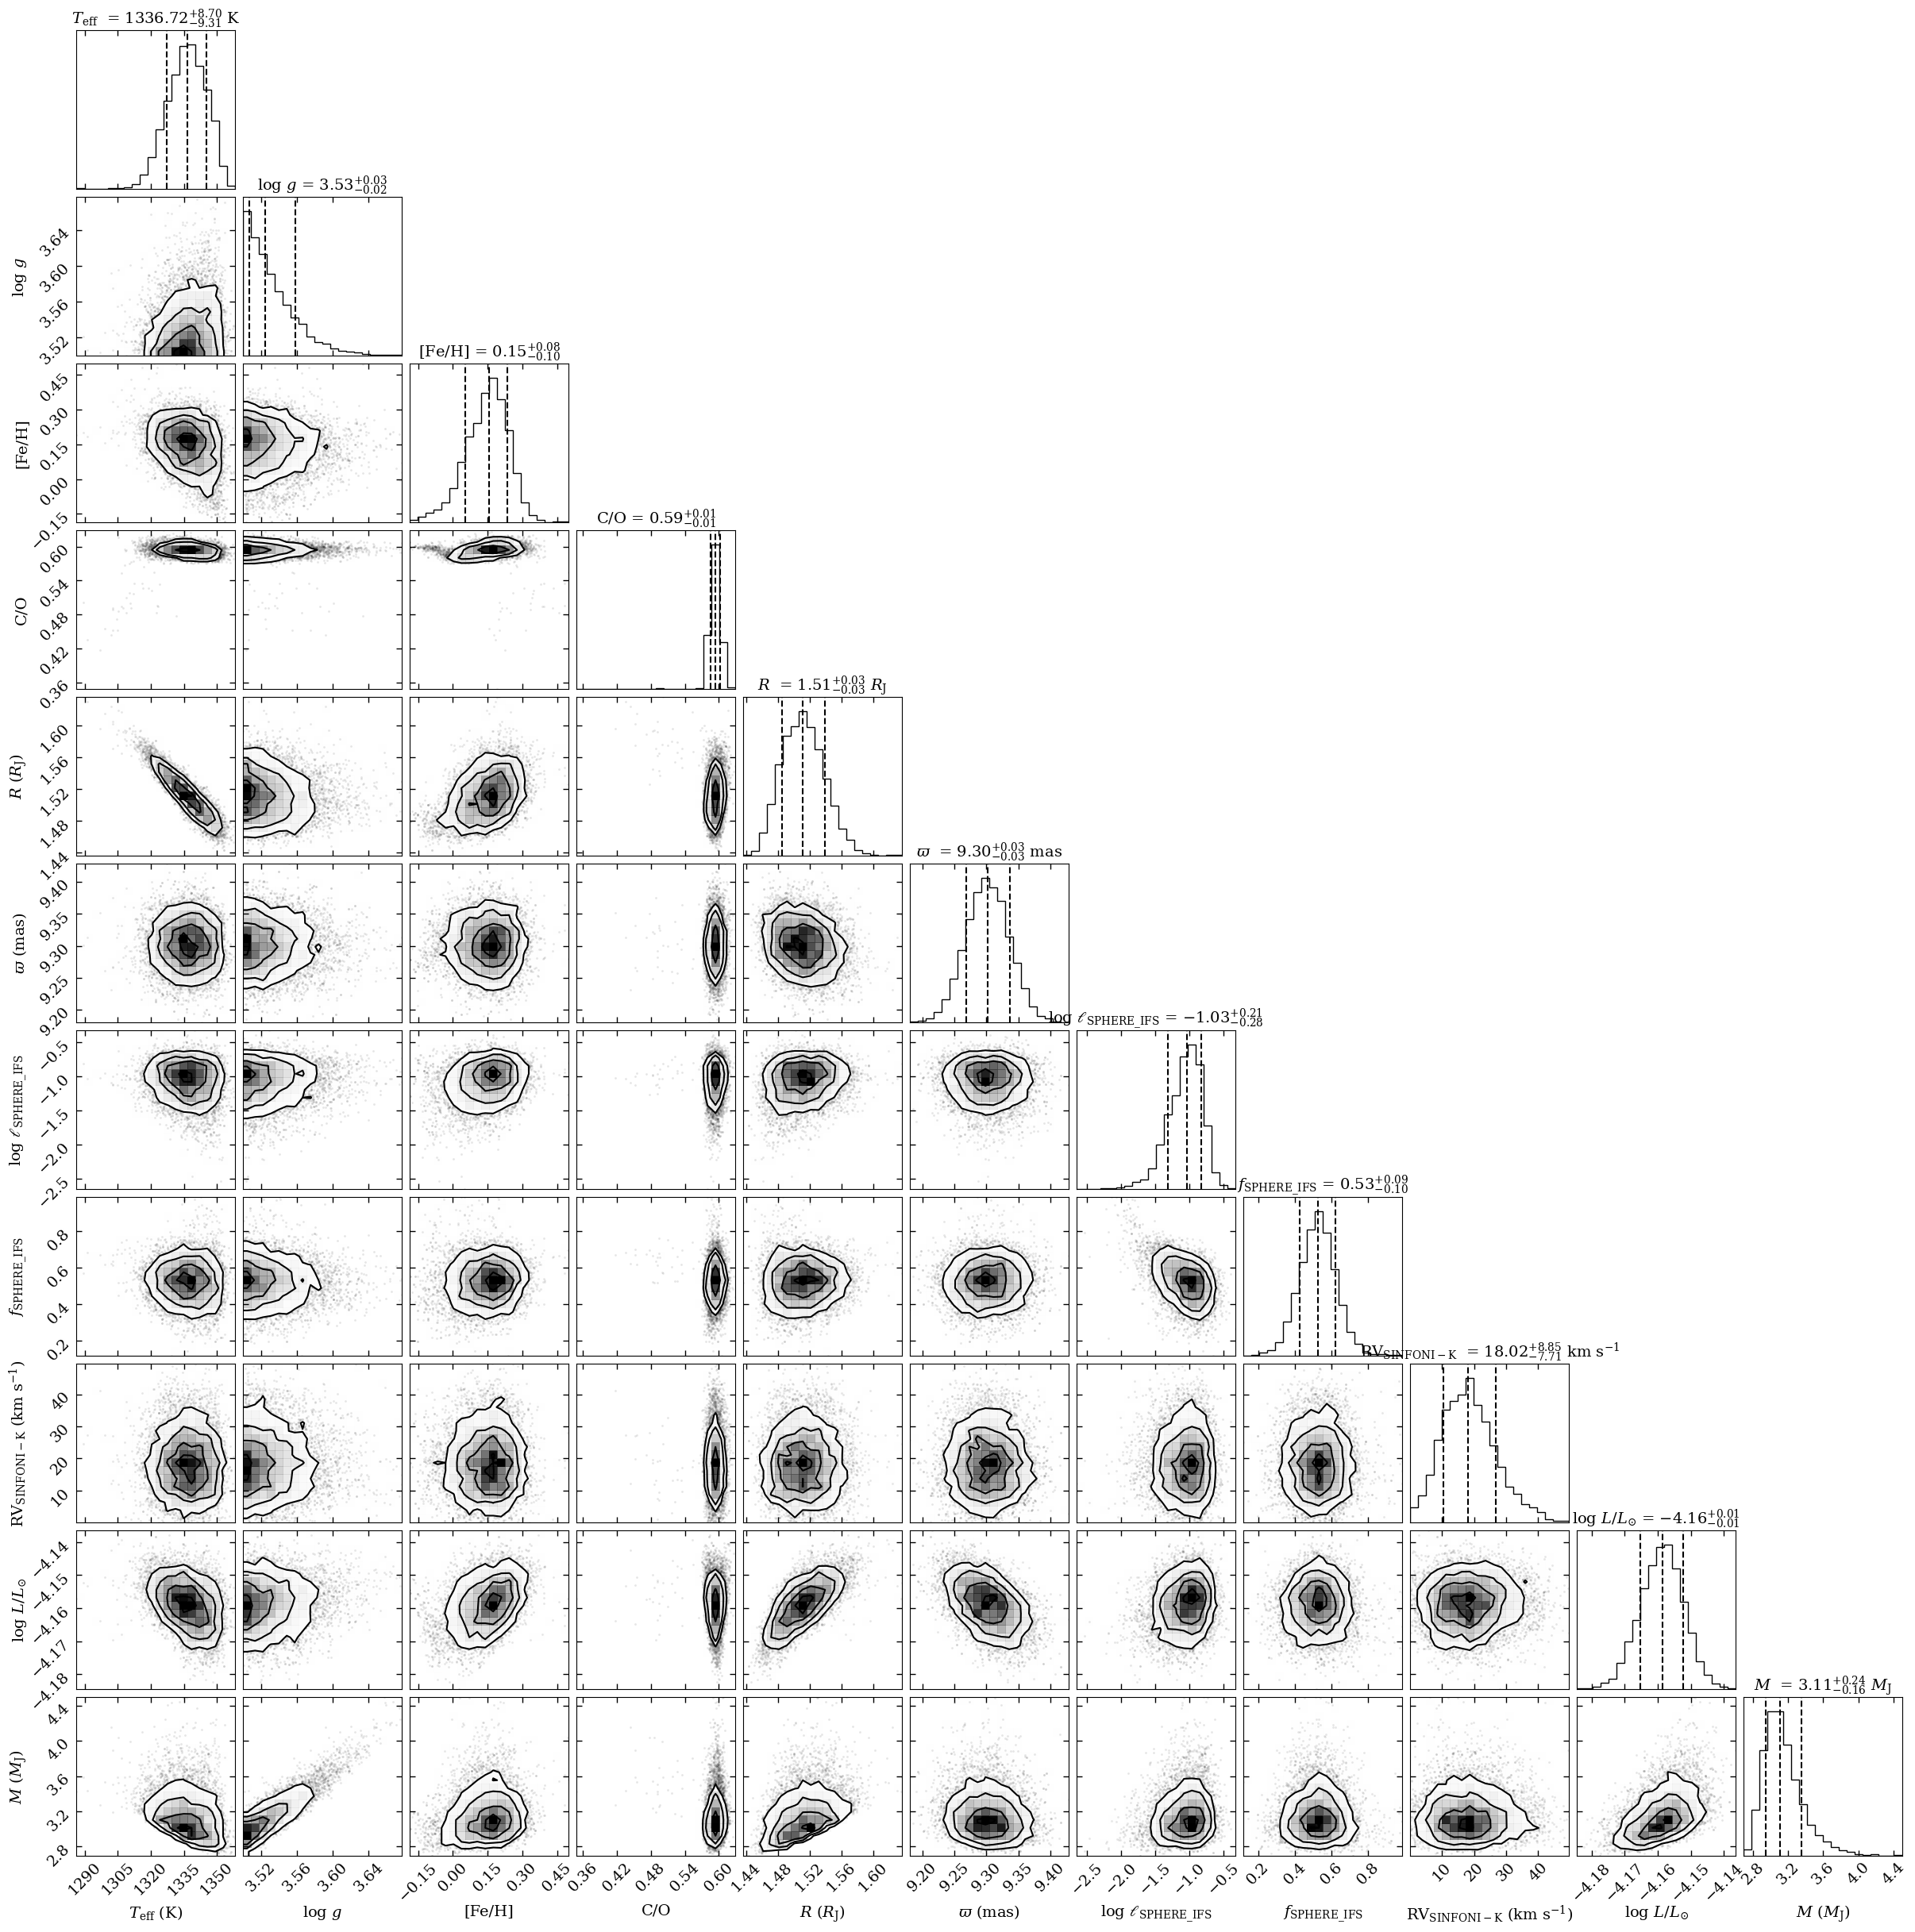

In [24]:
fig = species.plot_posterior(
    tag,
    offset=(-0.3, -0.3),
    # title_fmt=[
    #     ".0f",
    #     ".2f",
    #     ".2f",
    #     ".2f",
    #     ".2f",
    #     ".2f",
    #     ".1f",
    #     ".1f",
    #     ".0f",
    #     ".0f",
    #     ".2f",
    #     ".1f",
    # ],
    inc_luminosity=True,
    inc_mass=True,
    output="{}post.png".format(filepref),
)

for ax in fig.get_axes():
    ax.tick_params(axis="both", labelsize=16)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=16)
fig.savefig("{}post.png".format(filepref))

Getting MCMC spectra:   0%|          | 0/30 [00:00<?, ?it/s]

/Users/bluez3303/Documents/GitHub/species/species/read/read_model.py:799: UserWarning: The 'radvel_SINFONI-K' parameter is not required by 'exo-rem' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg', 'feh', 'c_o_ratio'].
  warnings.warn(
/Users/bluez3303/Documents/GitHub/species/species/read/read_model.py:799: UserWarning: The 'corr_len_SPHERE_IFS' parameter is not required by 'exo-rem' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg', 'feh', 'c_o_ratio'].
  warnings.warn(
/Users/bluez3303/Documents/GitHub/species/species/read/read_model.py:799: UserWarning: The 'corr_amp_SPHERE_IFS' parameter is not required by 'exo-rem' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg', 'feh', 'c_o_ratio'].
  warnings.warn(


Getting object: HIP 65426 b... [DONE]
Calculating synthetic photometry...

/Users/bluez3303/Documents/GitHub/species/species/util/read_util.py:176: DeprecationWarning: The update_spectra function is deprecated and will be removed in a future release. Please use the update_objectbox function instead.
  warnings.warn(


 [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - JWST/NIRCAM.F250M: 0.39
   - JWST/NIRCAM.F300M: -0.72
   - JWST/NIRCAM.F356W: 1.50
   - JWST/NIRCAM.F410M: 1.13
   - JWST/NIRCAM.F444W: 2.16
   - Paranal/NACO.Lp: 2.56
   - Paranal/NACO.Mp: 2.31
   - Paranal/NACO.NB405: 1.22
   - Paranal/SPHERE.IRDIS_D_H23_2: 2.18
   - Paranal/SPHERE.IRDIS_D_H23_3: 1.58
   - Paranal/SPHERE.IRDIS_D_K12_1: 0.82
   - Paranal/SPHERE.IRDIS_D_K12_2: 0.18
   - GRAVITY: min: -1.69, max: 2.48
   - SINFONI-K: min: -1.28, max: 2.45
   - SPHERE_IFS: min: -3.06, max: 2.29
Reduced chi2 = 0.19
Number of degrees of freedom = 2211
Calculating synthetic photometry... [DONE]
Plotting spectrum: results/gravity_sinfoni_jwst_exo-rem/HIP65426b-SED.pdf... [DONE]


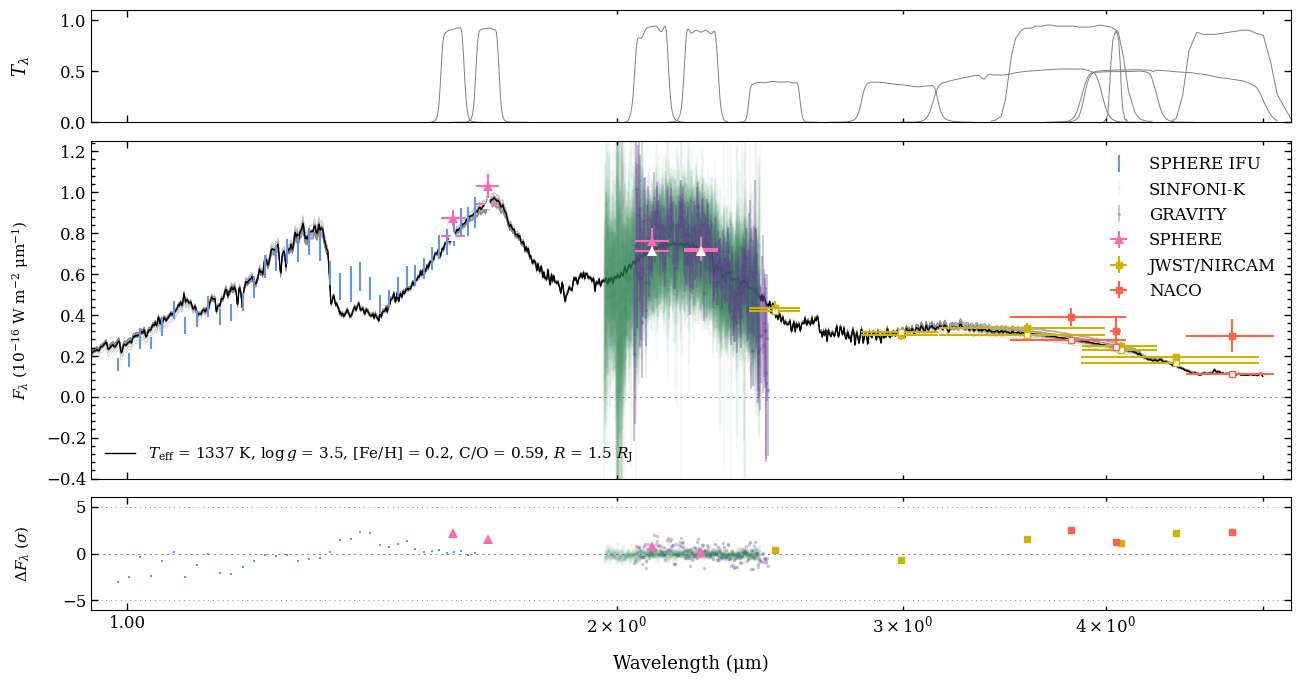

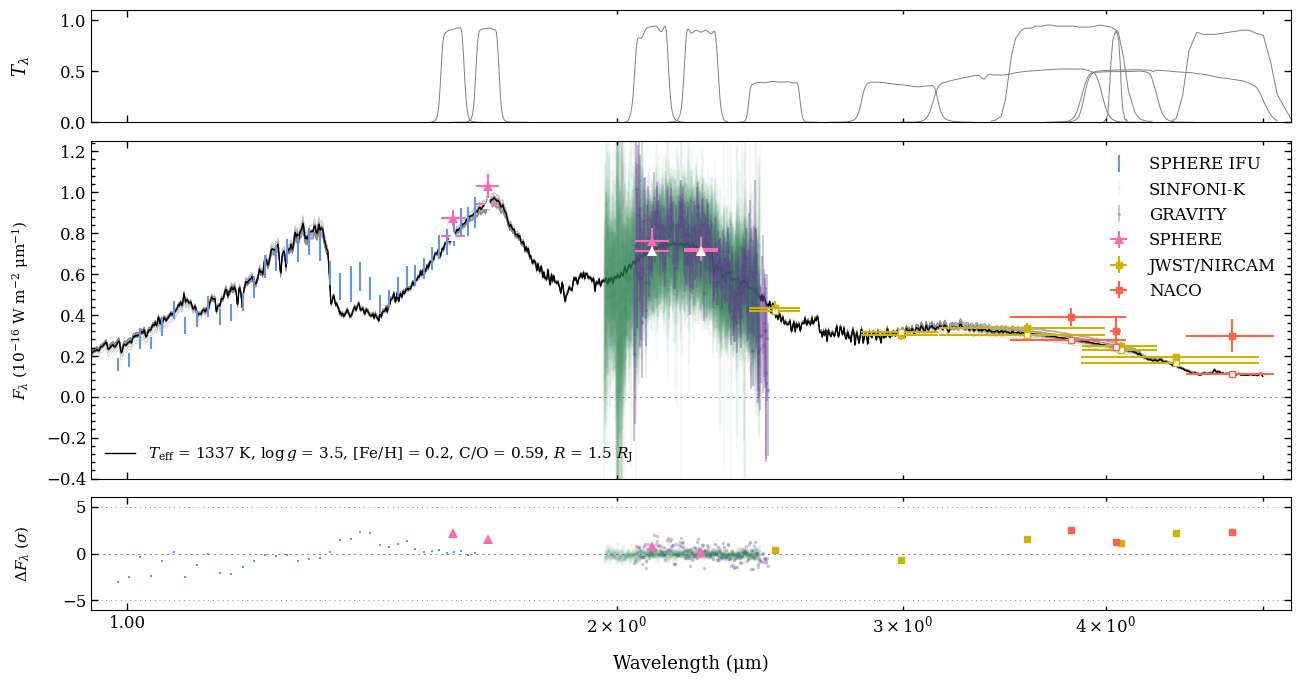

In [18]:
samples = database.get_mcmc_spectra(
    tag=tag, random=30, wavel_range=None, spec_res=500.0
)

best = database.get_median_sample(tag=tag)

read_model = species.ReadModel(model=model_choice, wavel_range=None)

modelbox = read_model.get_model(model_param=best, spec_res=500.0, smooth=True)

objectbox = database.get_object(object_name="HIP 65426 b", inc_phot=True, inc_spec=True)

objectbox = species.update_spectra(objectbox=objectbox, model_param=best)

residuals = species.get_residuals(
    datatype="model",
    spectrum=model_choice,
    parameters=best,
    objectbox=objectbox,
    inc_phot=True,
    inc_spec=True,
)

synphot = species.multi_photometry(
    datatype="model", spectrum=model_choice, filters=objectbox.filters, parameters=best
)

species.plot_spectrum(
    boxes=[samples, modelbox, objectbox, synphot],
    filters=objectbox.filters,
    residuals=residuals,
    plot_kwargs=[
        {"ls": "-", "lw": 0.2, "color": "gray"},
        {"ls": "-", "lw": 1.0, "color": "black"},
        {
            "GRAVITY": {
                "marker": ".",
                "ms": 5.0,
                "mew": 0.0,
                "color": "rebeccapurple",
                "ls": "none",
                "alpha": 0.3,
                "label": "GRAVITY",
            },
            "SINFONI-K": {
                "marker": ".",
                "ms": 5.0,
                "mew": 0.0,
                "color": "seagreen",
                "ls": "none",
                "alpha": 0.05,
                "label": "SINFONI-K",
            },
            "SPHERE_IFS": {
                "marker": "s",
                "ms": 2.0,
                "mew": 0.0,
                "color": "cornflowerblue",
                "ls": "",
                "alpha": 1,
                "label": "SPHERE IFU",
            },
            "Paranal/NACO.Lp": {
                "marker": "s",
                "ms": 5.0,
                "color": "tomato",
                "ls": "none",
                "label": "NACO",
            },
            "Paranal/NACO.NB405": {
                "marker": "s",
                "markersize": 5.0,
                "color": "tomato",
                "ls": "none",
            },
            "Paranal/NACO.Mp": {
                "marker": "s",
                "markersize": 5.0,
                "color": "tomato",
                "ls": "none",
            },
            "JWST/NIRCAM.F250M": {
                "marker": "s",
                "markersize": 5.0,
                "color": "xkcd:mustard",
                "ls": "none",
                "label": "JWST/NIRCAM",
            },
            "JWST/NIRCAM.F300M": {
                "marker": "s",
                "markersize": 5.0,
                "color": "xkcd:mustard",
                "ls": "none",
            },
            "JWST/NIRCAM.F356W": {
                "marker": "s",
                "markersize": 5.0,
                "color": "xkcd:mustard",
                "ls": "none",
            },
            "JWST/NIRCAM.F410M": {
                "marker": "s",
                "markersize": 5.0,
                "color": "xkcd:mustard",
                "ls": "none",
            },
            "JWST/NIRCAM.F444W": {
                "marker": "s",
                "markersize": 5.0,
                "color": "xkcd:mustard",
                "ls": "none",
            },
            "JWST/MIRI.F1140C": {
                "marker": "s",
                "markersize": 5.0,
                "color": "purple",
                "ls": "none",
                "label": "JWST/MIRI",
            },
            "JWST/MIRI.F1550C": {
                "marker": "s",
                "markersize": 5.0,
                "color": "purple",
                "ls": "none",
            },
            "Paranal/SPHERE.IRDIS_D_H23_2": {
                "marker": "^",
                "ms": 7.0,
                "mew": 0.0,
                "color": "hotpink",
                "ls": "",
                "alpha": 1,
                "label": "SPHERE",
            },
            "Paranal/SPHERE.IRDIS_D_H23_3": {
                "marker": "^",
                "ms": 7.0,
                "mew": 0.0,
                "color": "hotpink",
                "ls": "",
                "alpha": 1,
            },
            "Paranal/SPHERE.IRDIS_D_K12_1": {
                "marker": "^",
                "ms": 7.0,
                "mew": 0.0,
                "color": "hotpink",
                "ls": "",
                "alpha": 1,
            },
            "Paranal/SPHERE.IRDIS_D_K12_2": {
                "marker": "^",
                "ms": 7.0,
                "mew": 0.0,
                "color": "hotpink",
                "ls": "",
                "alpha": 1,
            },
        },
        None,
    ],
    #       xlim=(0.95, 20),
    xlim=(0.95, 5.2),
    ylim=(-4e-17, 125e-18),
    ylim_res=(-6.0, 6.0),
    scale=("log", "linear"),
    offset=(-0.4, -0.05),
    legend=[
        {"loc": "lower left", "frameon": False, "fontsize": 11.0},
        {"loc": "upper right", "frameon": False, "fontsize": 12.0},
    ],
    figsize=(12.0, 6.0),
    quantity="flux density",
    output=filepref + "HIP65426b-SED.pdf",
)